In [29]:
pip install missingno

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [31]:
# Генерация примера данных
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.4, random_state=987, shuffle=False)

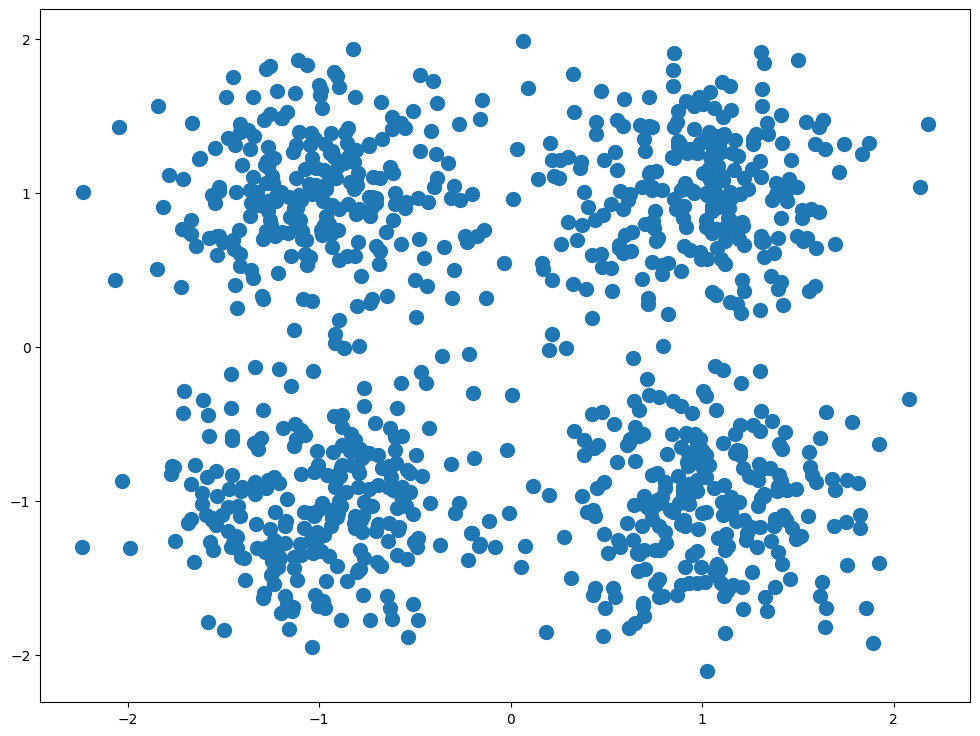

In [32]:
plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [33]:
X = StandardScaler().fit_transform(X)

In [34]:
print(X.shape)

(1000, 2)


In [35]:
dbscan1 = DBSCAN().fit_predict(X)

In [36]:
print(dbscan1)
unique_labels = set(dbscan1)
print(f"Sets: {unique_labels}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

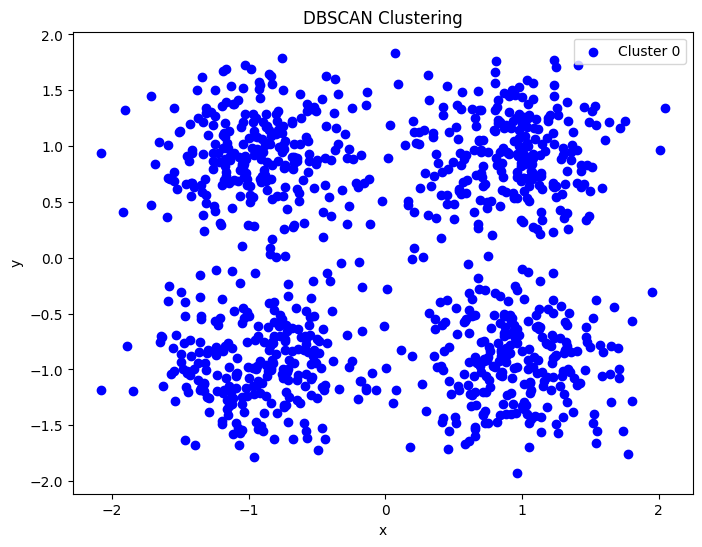

In [37]:
plt.figure(figsize=(8, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for class_label in np.unique(dbscan1):
    X_class = X[dbscan1 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [38]:
dbscan2 = DBSCAN(eps=0.3, min_samples=30, metric='euclidean').fit_predict(X)

In [39]:
print(dbscan2)
unique_labels2 = set(dbscan2)
print(f"Sets: {unique_labels2}")

[-1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  1  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  2  2  2  2  2 -1  2  2  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2
  2  2  2 -1  2 -1  2  2  2  2 -1  2  2 -1  2  2  2

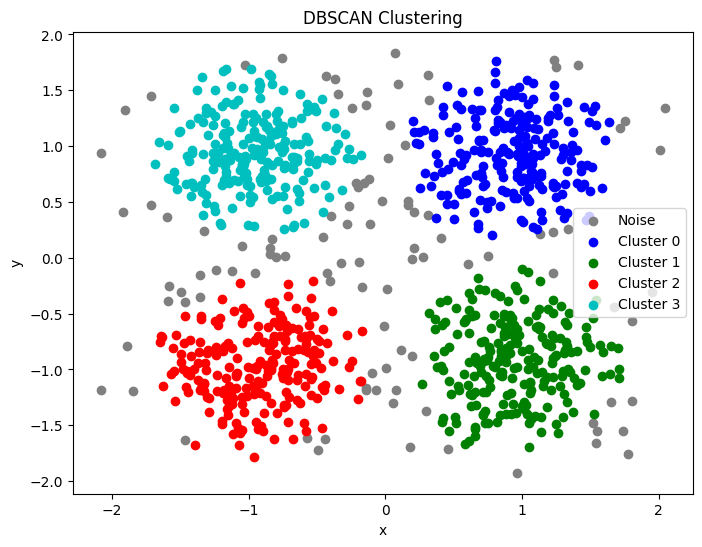

In [40]:
plt.figure(figsize=(8, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for class_label in np.unique(dbscan2):
    X_class = X[dbscan2 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

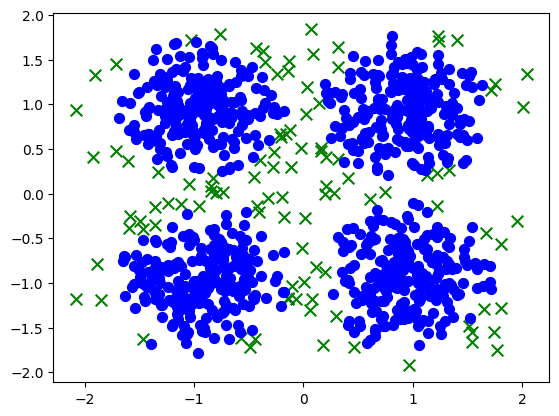

In [41]:
plt.scatter(X[dbscan2==-1, 0], X[dbscan2==-1, 1], c='green', s=70, marker='x')
plt.scatter(X[dbscan2!=-1, 0], X[dbscan2!=-1, 1], c='blue', s=50)
plt.show()

In [42]:
dbscan3 = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit_predict(X)

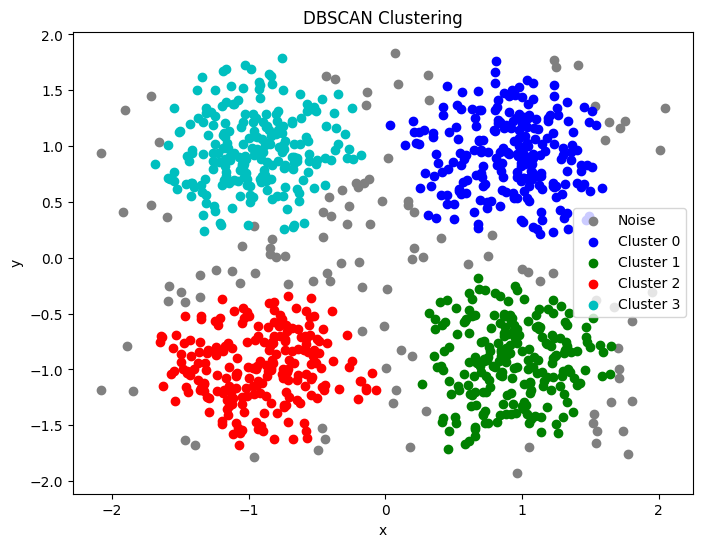

In [43]:
# Визуализация результатов
plt.figure(figsize=(8, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for class_label in np.unique(dbscan3):
    X_class = X[dbscan3 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

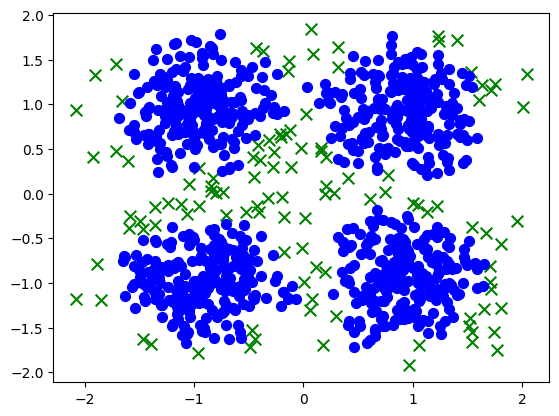

In [44]:
plt.scatter(X[dbscan3==-1, 0], X[dbscan3==-1, 1], c='green', s=70, marker='x')
plt.scatter(X[dbscan3!=-1, 0], X[dbscan3!=-1, 1], c='blue', s=50)
plt.show()

In [45]:
dbscan4 = DBSCAN(eps=0.15, min_samples=10, metric='euclidean').fit_predict(X)

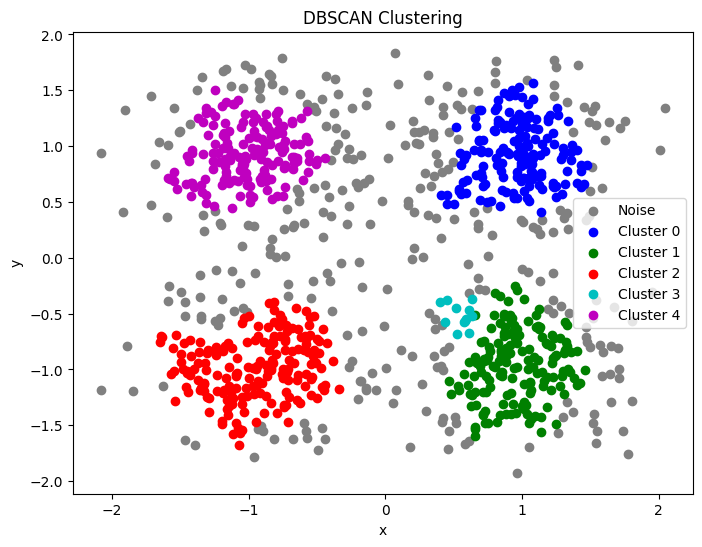

In [46]:
# Визуализация результатов
plt.figure(figsize=(8, 6))

# Различные цвета для различных кластеров
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for class_label in np.unique(dbscan4):
    X_class = X[dbscan4 == class_label]
    if class_label == -1:
        plt.scatter(X_class[:, 0], X_class[:, 1], c='grey', label='Noise')
    else:
        plt.scatter(X_class[:, 0], X_class[:, 1], c=colors[class_label], label=f'Cluster {class_label}')

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

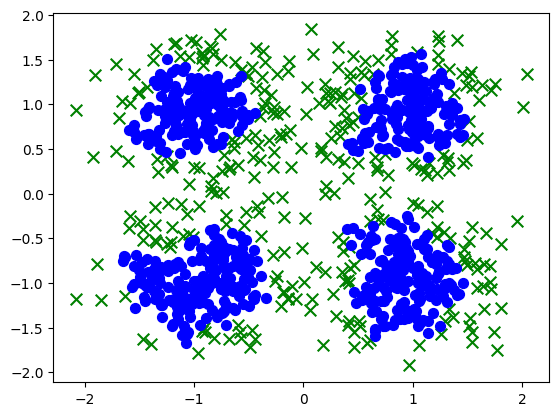

In [47]:
plt.scatter(X[dbscan4==-1, 0], X[dbscan4==-1, 1], c='green', s=70, marker='x')
plt.scatter(X[dbscan4!=-1, 0], X[dbscan4!=-1, 1], c='blue', s=50)
plt.show()

In [48]:
dbscan5 = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
clusters = dbscan5.fit_predict(X)
silhouette = silhouette_score(X, clusters)
print(silhouette)

0.5246200527301237
